In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as validator
from utils import *
from matplotlib.ticker import MaxNLocator

In [16]:
dist, dist_to_line = distance, distance_to_line

def find_next_focus_point3(p1, p2, q1, q2):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)

def isin(elt, L):
    return np.any([np.all(elt == l) for l in L])

In [7]:
def sort_points_over_seg(A, B, points):
    """
    TODO : doctring & unittest
    (Points containes points on segment [A, B])
    Add points on segment [A, B] in the right order
    """
    return sorted(points, key = lambda p : distance(p, A))

In [8]:
def add_intersections(A, B):
    """TODO : docstring & unittest"""
    S = []
    I = []
    for i in range(len(A)-1):
        line = []
        S.append(A[i])
        for j in range(0, len(B)-1):
#             print(A[i], A[i+1], B[j], B[j+1])
            intersect = intersection_btw_segs(A[i], A[i+1], B[j], B[j+1])
            if np.all(intersect != np.inf):
                line.append(intersect)
                I.append(intersect)
        S.extend(sort_points_over_seg(A[i], A[i+1], line))
    S.append(A[-1])
    return np.array(S), np.array(I)

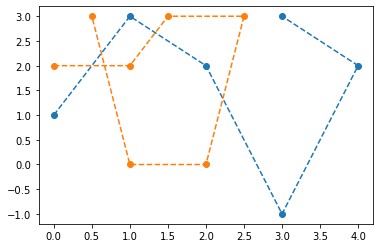

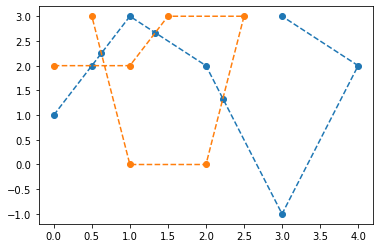

[[0.5        2.        ]
 [0.625      2.25      ]
 [1.33333333 2.66666667]
 [2.22222222 1.33333333]]


In [9]:
X = np.array([[0, 1], [1, 3], [2, 2], [3, -1], [4, 2], [3, 3]])
Y = np.array([[0, 2], [1, 2], [1.5, 3], [2.5, 3], [2, 0], [1, 0], [0.5, 3]])
# X  = np.array([[0. ,2.], [2., 2.], [2., 0.]])
# Y = np.array([[1.,  1. ],  [2.4, 1. ],  [3.,  0. ]])
plt.plot(*X.T, '--o')
plt.plot(*Y.T, '--o')
S, I = add_intersections(X, Y)
plt.figure()
# print(S)
plt.plot(*S.T, '--o')
plt.plot(*Y.T, '--o')
plt.show()
print(I)

In [24]:
def error_btw_trajectories(A, B):
    assert len(A) >= 2 and len(B) >= 1, "IncorrectInputTrajectories"
    S, I  = add_intersections(A, B)
    T, I = add_intersections(B, A)
    I = I if len(I) else []
    i, j = 0, 0
    error = [0]
    
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid()
#     plt.axis("equal")
    
    while i < len(S) - 1 and j < len(T) - 1:
#         print(i, j, f"si={S[i]}, tj={T[j]}, si+1={S[i+1]}, tj+1={T[j+1]}, err={error}")
#         print(isin(T, I), isin(S, I))
        if np.all(S[i] == T[j]):
#             print("=== Both on intersection ===")
            error.append(triangle_area_oriented(S[i], S[i+1], T[j+1], ax))
            i += 1
            j += 1
#             print(i, j, len(S), len(T))
#             print(i, j, f"si={S[i]}, tj={T[j]}, si+1={S[i+1]}, tj+1={T[j+1]}, err={error}")

        elif isin(S[i], I):
#             print("=== Intersection on S ===")
            while not isin(T[j], I):
                error[-1] += triangle_area_oriented(S[i], T[j], T[j+1], ax)
                j += 1
        elif isin(T[j], I):
#             print("=== Intersection on T ===", "tj = ", T[j], I, T[j] in I, type(T), type(I))
            while not isin(S[i], I):
                error[-1] += triangle_area_oriented(S[i], T[j], S[i+1], ax)
                i += 1
        else:
            if find_next_focus_point3(S[i], S[i+1], T[j], T[j+1]):
                error[-1] += triangle_area_oriented(S[i], T[j], S[i+1], ax)
                i += 1
            else:
                error[-1] += triangle_area_oriented(S[i], T[j], T[j+1], ax)
                j += 1
    
#     print("=== END phase ===")
    error.append(0)
    if not(i == len(S)-1 and j == len(T)-1):
        if i == len(S) - 1:
            error[-1] += triangle_area_oriented(S[i], T[j], T[j+1], ax)
            j += 1
            for j in range(j, len(T) - 1):
                error[-1] += triangle_area_oriented(S[i], T[j], T[j+1], ax)
        elif j == len(T) - 1: #else ?
            error[-1] += triangle_area_oriented(S[i], T[j], S[i+1], ax)
            i += 1
            for i in range(i, len(S)-1):
                error[-1] += triangle_area_oriented(S[i], T[j], S[i+1], ax)
    
    plt.show()
    Slen = sum(norm(S[i+1] - S[i]) for i in range(len(S) - 1))
    print([abs(err) for err in error])
    return sum(abs(err) for err in error) / Slen

test0.txt	

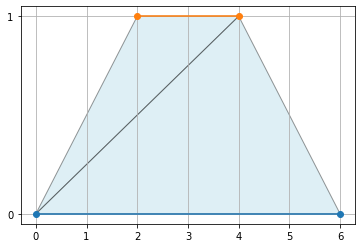

[1.0, 3.0]
ok 	 The expected value is indeed 0.6666666666666666

test1.txt	

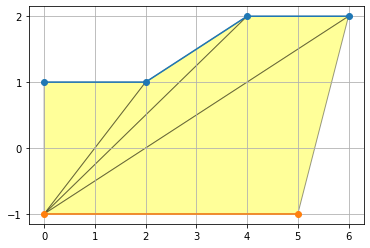

[6.0, 7.5]
ok 	 The expected value is indeed 2.1648256639775307

test10.txt	

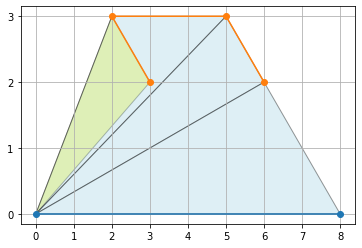

[6.0, 8.0]
ok 	 The expected value is indeed 1.75

test11.txt	

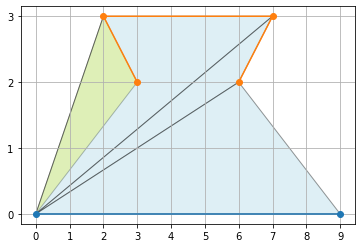

[7.0, 9.0]
ok 	 The expected value is indeed 1.7777777777777777

test12.txt	

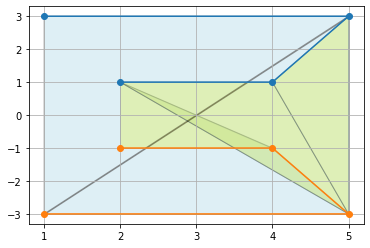

[4.0, 12.0]
NOT ok 	 The expected value is 2.9140118883872597, but the output value is 1.942674592258173.

test13.txt	

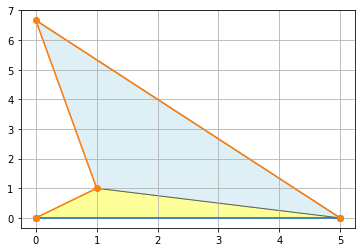

[0, 2.5, 10.83333333334]
NOT ok 	 The expected value is 2.0, but the output value is 2.666666666668.

test2.txt	

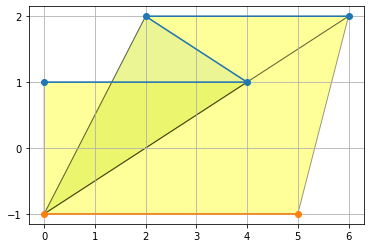

[6.0, 7.5]
ok 	 The expected value is indeed 1.3188658017585226

test3.txt	

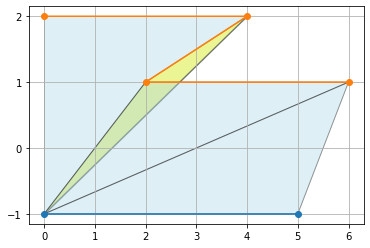

[9.0, 5.0]
ok 	 The expected value is indeed 2.8

test4.txt	

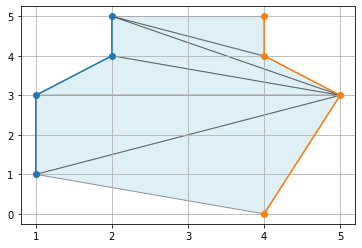

[9.0, 5.0]
ok 	 The expected value is indeed 3.17157287525381

test5.txt	

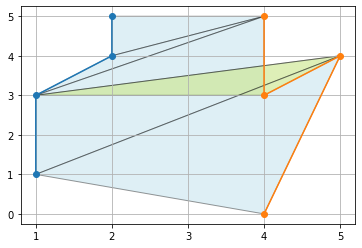

[7.0, 6.5]
ok 	 The expected value is indeed 3.058302415423317

test6.txt	

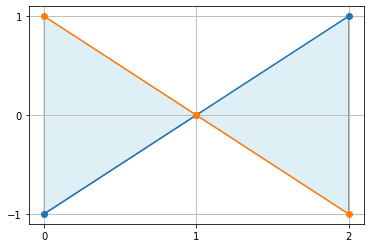

[1.0, 1.0, 0]
ok 	 The expected value is indeed 0.7071067811865475

test8.txt	

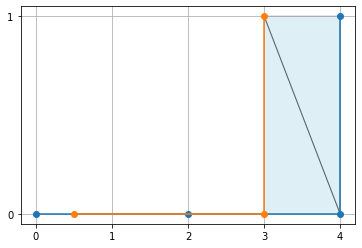

[0.5, 0.5]
ok 	 The expected value is indeed 0.2

test9.txt	

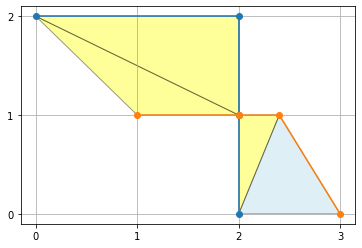

[1.5, 0.19999999999999996, 0.5]
ok 	 The expected value is indeed 0.55



False

In [25]:
validator.test(error_btw_trajectories, samples_range = slice(0, None), dirname = "test/")

In [26]:
import unittest
from os import listdir

In [27]:
def fetch_test_data(dirname, correct = True, criterion = '.txt', sep = ',', samples = slice(0, None)):
    """
    >>> fetch_test_data("indoor-location-oracles/Oracles/CorrectInputTrajectories/")[0]
    ['10_parallelTrajectories.txt', array([[1., 1.],
           [3., 1.]]), array([[1., 2.],
           [3., 2.]]), 1.0, 0.001]
    >>> fetch_test_data("indoor-location-oracles/Oracles/IncorrectInputTrajectories/", False)[2]
    [array([[0., 0.],
           [1., 0.]]), array([], dtype=float64)]
    >>> fetch_test_data("indoor-location-oracles/Oracles/IncorrectInputTrajectories/", False)[1]
    [array([[0., 1.]]), array([], dtype=float64)]
    """
    test_file_names = [filename for filename in listdir(dirname) if criterion in filename]
    tests_sample = []
    for filename in sorted(test_file_names)[samples]:
        with open(dirname + filename, "r") as file:
            lines = file.read().splitlines() # getting rid of \n
            data = [[float(n) for n in line.split(sep) if n] for line in lines] # parse data
        
        reference = np.array(list(zip(data[0], data[1]))) # line 0 : x-axis of the reference trajectory, line 1 : y-axis
        acquired = np.array(list(zip(data[2], data[3])))  # line 2 : x-axis of the acquired trajectory, line 3 : y-axis
        if correct:
            expected_output, = data[4] or [-1]
            epsilon, = data[5] or [-1]
            tests_sample.append([filename, reference, acquired, expected_output, epsilon])
        else:
            tests_sample.append([reference, acquired])
    return tests_sample

if __name__ == "__main__":
    doctest.testmod()

In [30]:
class TestEstimator(unittest.TestCase):
    
    def test_incorrect_input(self):
        dirname = "indoor-location-oracles/Oracles/IncorrectInputTrajectories/"
        for reference, acquired in fetch_test_data(dirname, correct = False):
            with self.assertRaises(AssertionError):
                error_btw_trajectories(reference, acquired)
    
    def test_correct_input(self):
        dirname = "indoor-location-oracles/Oracles/CorrectInputTrajectories/"
        for filename, reference, acquired, expected_output, epsilon \
         in fetch_test_data(dirname):
            output = error_btw_trajectories(reference, acquired)

            with self.subTest(test = filename, output = output, expected_output = expected_output):
                self.assertLessEqual(abs(expected_output - output), epsilon)

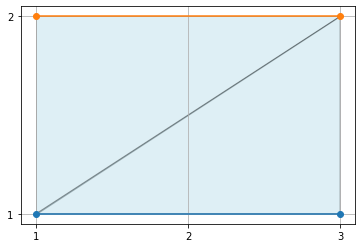

[1.0, 1.0]


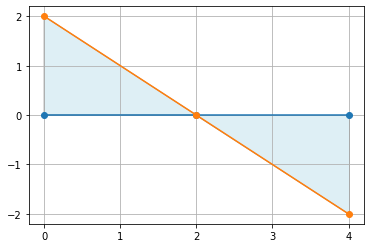

[2.0, 2.0, 0]


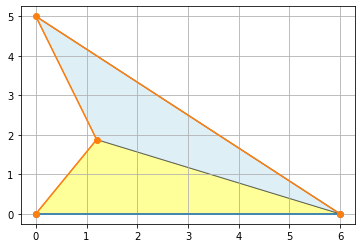

[0, 5.64, 6.36]


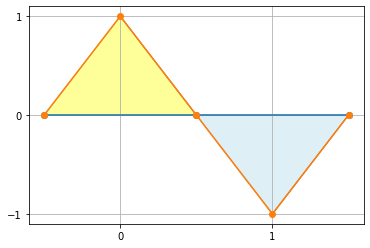

[0, 0.5, 0.5, 0.0]


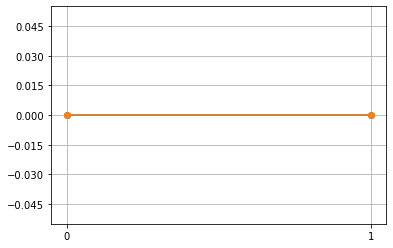

[0, 0.0, 0]


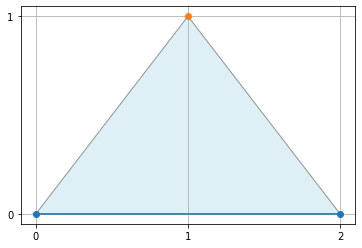

..

[0, 1.0]



----------------------------------------------------------------------
Ran 2 tests in 0.580s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [31]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestEstimator)
unittest.TextTestRunner().run(suite)